In [1]:
import pandas as pd
import sys
import os
sys.path.append('../')
from prompt.visualization_prompt import get_visualization_prompt
from claude_viz import call_claude
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV file
csv_file = 'Delinquency_prediction_dataset.csv'
df = pd.read_csv(csv_file)
print(f"Data shape: {df.shape}")
df.head()

Data shape: (500, 19)


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [3]:
# Safe numeric conversion
from safe_convert import safe_numeric_conversion
import numpy as np

df = safe_numeric_conversion(df)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {list(numeric_cols)}")


Numeric columns: ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Delinquent_Account', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']


/home/participant/ABSolution-1/scripts/safe_convert.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [4]:
# Call Claude via AWS Bedrock
from bedrock_claude import call_bedrock_claude

# Prepare data summary
data_summary = f"""
Data Overview:
{df.describe()}

Sample Data:
{df.head()}
"""

In [5]:
data_context = f"Dataset with {df.shape[0]} rows and {df.shape[1]} columns. Columns: {list(df.columns)}"


Code Prompt: 
You are a data visualization expert. Given the following data context, generate complete Python plotting code.

Dataset with 500 rows and 19 columns. Columns: ['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Delinquent_Account', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure', 'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

REQUIREMENTS:
1. Generate executable matplotlib/seaborn code
2. Use 'df' as the dataframe variable
3. Create 2-3 appropriate visualizations
4. Include proper titles, labels, and formatting
5. Use plt.show() to display plots

FORMAT YOUR RESPONSE AS:
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Your plotting code here
plt.figure(figsize=(12, 8))
# ... visualization code ...
plt.show()
```

Generate the code now:

Nova's Generated Code:
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Sample da

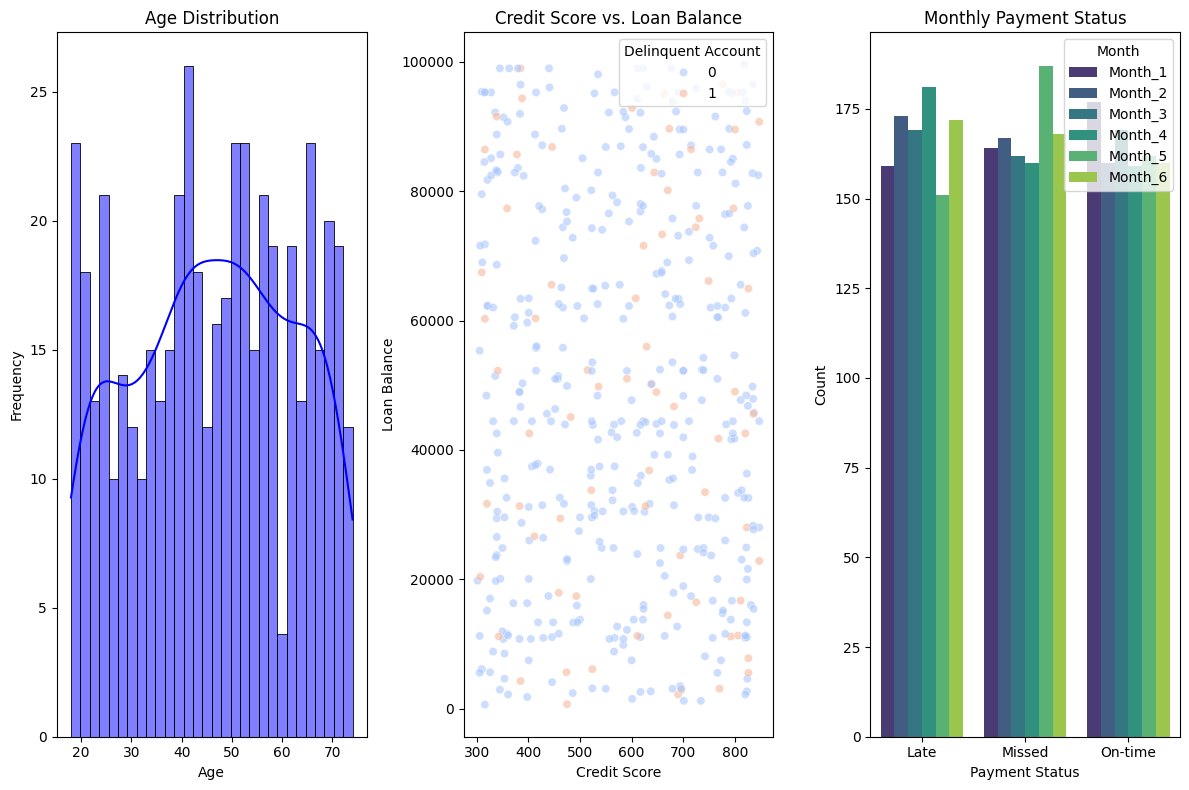

In [6]:
# Call Nova Lite via AWS Bedrock
from bedrock_nova import call_bedrock_nova
from code_gen_prompt import get_code_generation_prompt

# Get code generation prompt
code_prompt = get_code_generation_prompt(data_context)
print(f'Code Prompt: {code_prompt}')

# Get Nova's code
code_response = call_bedrock_nova(code_prompt, data_summary)
print("Nova's Generated Code:")
print(code_response)

# Execute the generated code
exec(code_response.split('```python')[1].split('```')[0])
